In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = "C:/Users/JUNE BUSINESS/Downloads/archive/housing.csv"

In [3]:
df = pd.read_csv(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df["ocean_proximity"] = df["ocean_proximity"].str.lower().str.replace(" ", "_")
df["ocean_proximity"] 

0        near_bay
1        near_bay
2        near_bay
3        near_bay
4        near_bay
           ...   
20635      inland
20636      inland
20637      inland
20638      inland
20639      inland
Name: ocean_proximity, Length: 20640, dtype: object

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


<Axes: xlabel='median_house_value', ylabel='Count'>

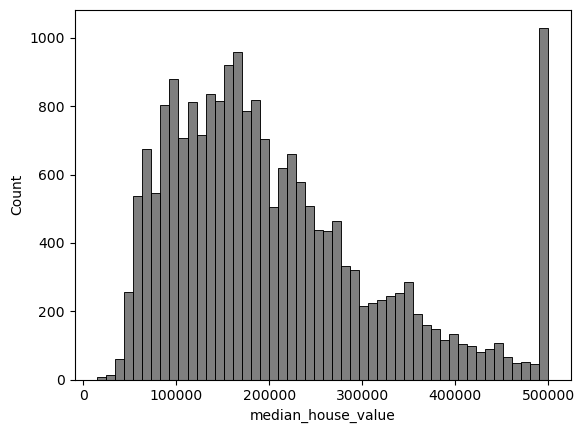

In [6]:
sns.histplot(df["median_house_value"], color='black', alpha=0.5, bins=50)

In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: count, dtype: int64

In [8]:
df = df[(df['ocean_proximity'] == 'inland')|(df['ocean_proximity'] == '<1h_ocean')]
df = df.reset_index(drop=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1h_ocean
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1h_ocean
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1h_ocean
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1h_ocean
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1h_ocean
...,...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [9]:
base = list(df.columns)
base.pop()
df = df[base]

In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [11]:
df[base].isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [12]:
def prepare_x(df, f=df['total_bedrooms'].mean()):
    df = df.copy()
    df['total_bedrooms'] = df['total_bedrooms'].fillna(f)
    return df.values
df.describe()
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [13]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_val, n_test

(15687, 3137, 3137)

In [14]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [16]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(XT).dot(y)
    return w_full[0], w_full[1:]

In [18]:
def rmse(y, y_pred):
    se = (y_pred - y) ** 2
    mse = se.mean()
    return np.sqrt(mse)
    

In [19]:
x_train = prepare_x(df_train)
w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_train.dot(w)
score_train = rmse(y_train, y_pred)
round(score_train, 2)

0.34

In [20]:
x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)
score_val = rmse(y_val, y_pred)
round(score_val, 2)

0.34

In [21]:
x_train = prepare_x(df_train, f=0)
w0, w = train_linear_regression(x_train, y_train)
y_pred = w0 + x_train.dot(w)
score_train = rmse(y_train, y_pred)
round(score_train, 2)

0.34

In [22]:
x_val = prepare_x(df_val)
y_pred = w0 + x_val.dot(w)
score_val = rmse(y_val, y_pred)
round(score_val,2)

0.34

In [23]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [24]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    x_train = prepare_x(df_train, f=0)
    
    w0, w = train_linear_regression_reg(x_train, y_train, r=r)
    x_val = prepare_x(df_val, f=0)
    y_pred = w0 + x_val.dot(w)
    
    score = rmse(y_val, y_pred)
    print(f"r: {r}, w0: {w0}, score: {score}")

r: 0, w0: -9.763249478133067, score: 0.34084790341236515
r: 1e-06, w0: -9.763228830443015, score: 0.3408479061802453
r: 0.0001, w0: -9.761185235308517, score: 0.34084818005971734
r: 0.001, w0: -9.742646249005404, score: 0.3408506921949536
r: 0.01, w0: -9.5610561928948, score: 0.3408779300439616
r: 0.1, w0: -8.058889769482795, score: 0.3412862041979522
r: 1, w0: -3.1331542783971735, score: 0.344895832762758
r: 5, w0: -0.8410867974643321, score: 0.34773980704848945
r: 10, w0: -0.43811723168084055, score: 0.34831498335187544


In [25]:
def answer_question_5():
    scores = []
    for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        idx = np.arange(n)
        np.random.seed(i)
        np.random.shuffle(idx)
        
        df_train = df.iloc[idx[:n_train]]
        df_val = df.iloc[idx[n_train:n_train+n_val]]
        df_test = df.iloc[idx[n_train+n_val:]]

        y_train = df_train['median_house_value'].values
        y_val = df_val['median_house_value'].values
        y_test = df_test['median_house_value'].values

        df_train = df_train.reset_index(drop=True)
        df_val = df_val.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)

        del df_train['median_house_value']
        del df_val['median_house_value']
        del df_test['median_house_value']

        y_train = np.log1p(y_train)
        y_val = np.log1p(y_val)
        y_test = np.log1p(y_test)
        
        x_train = prepare_x(df_train, f=0)
        w0, w = train_linear_regression(x_train, y_train)
        
        x_val = prepare_x(df_val, f=0)
        y_pred = w0 + x_val.dot(w)
        score = rmse(y_test, y_pred)
        scores += [score]
        
    return round(np.std(scores), 3)


answer = answer_question_5()

print(answer)

0.01


In [26]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

In [27]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.05,32.82,16.0,4046.0,731.0,1684.0,701.0,4.2312
1,-118.00,33.91,19.0,5166.0,770.0,2374.0,753.0,5.9790
2,-121.96,37.25,35.0,1018.0,169.0,484.0,174.0,6.1648
3,-121.89,37.30,47.0,1604.0,284.0,639.0,278.0,5.8415
4,-118.14,33.96,34.0,2744.0,541.0,1333.0,503.0,4.0536
...,...,...,...,...,...,...,...,...
9408,-118.14,34.17,52.0,2687.0,600.0,1716.0,544.0,2.7201
9409,-118.10,34.01,42.0,1436.0,298.0,1005.0,298.0,3.4297
9410,-117.01,32.76,22.0,3626.0,824.0,1800.0,769.0,2.8594
9411,-117.10,34.57,6.0,5110.0,1044.0,1938.0,724.0,3.1917


In [28]:
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

x_full_train = prepare_x(df_full_train, f=0)
w0, w = train_linear_regression_reg(x_full_train, y_full_train, r=0.001)

x_test = prepare_x(df_test, f=0)
y_pred = w0 + x_test.dot(w)

print(rmse(y_test, y_pred))

0.3349899336605532
